# Week 3 Discussion

## Assignment Notes

Jupyter should automatically display images loaded with PIL:

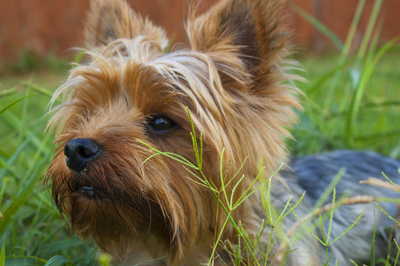

In [2]:
from PIL import Image

# Dog image from https://unsplash.com/photos/jx_kpR7cvDc
dog = Image.open("dog.png")
dog

If you don't see an image, an alternative way to load and display the image is:

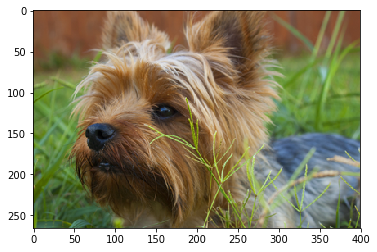

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as img

dog2 = img.imread("dog.png")
plt.imshow(dog2)
plt.show()

Matplotlib is a package for plotting, which we'll use throughout the quarter. Note that if you use matplotlib to load the image, you don't need the `as_image()` function from Assignment 2.

## Discussion Notes

### Reading & Parsing Files

The process for reading a file is:

1. Open the file.
2. Read from the file, saving anything you want to keep in a variable.
3. Close the file.

Reading from a file takes time (hard disks are slow), so you should try to minimize the number of times you open/read a file. For small files, you can save the entire contents into a variable:

In [4]:
f = open("foo.txt")
x = f.readlines()
f.close()

print x

['This is a file\n', 'Line 2\n', 'More lines\n', 'Hello\n', '56,73\n', '64,81\n', '92,3\n']


Closing the file is important because it frees up operating system resources. If you're writing to a file, closing the file also ensures that everything you wrote to the file gets saved on disk. It's easy to forget to close a file, so Python has a shortcut:

In [9]:
# Pythonic (or idiomatic) way to write the code above:
with open("foo.txt") as f:
    x = f.readlines()
    
print x

['This is a file\n', 'Line 2\n', 'More lines\n', 'Hello\n', '56,73\n', '64,81\n', '92,3\n']


The `with` statement keeps the file open until the indented block ends, then automatically closes the file. You should use `with` unless you have a good reason not to.

Once the file is open, you might want to convert (or _parse_) the contents to a convenient format. The most concise way to do this is with list comprehensions:

In [20]:
# For the first 4 lines (the text), just strip off whitespace.
text = [y.strip() for y in x[:4]]
print text

# For the remaining lines (the data), strip off whitespace and then split on ",".
data = [y.strip().split(",") for y in x[4:]]
print data

# To convert the data from strings to numbers, you can use a nested list comprehension:
data = [[int(z) for z in y] for y in data]
print data

# If you don't like nested list comprehensions, you can also use map() here:
data = [map(int, y) for y in data]
print data

['This is a file', 'Line 2', 'More lines', 'Hello']
[['56', '73'], ['64', '81'], ['92', '3']]
[[56, 73], [64, 81], [92, 3]]
[[56, 73], [64, 81], [92, 3]]


If you want to apply a multi-step process to each line, use generator expressions. Alternatively, you can change the code to use a for-loop:

In [23]:
alt_data = []
for line in x[4:]:
    fst, snd = line.strip().split(",")
    alt_data.append([int(fst), int(snd)])
    
print alt_data

[[56, 73], [64, 81], [92, 3]]


### Pattern Matching

In Python, the standard way to return multiple values from a function is to return a tuple. For instance, this function returns two numbers:

In [32]:
def get_nums():
    return 3, 4, 7

get_nums()

(3, 4, 7)

Occasionally you'll want to assign elements in a tuple to different variables. You can do this with pattern matching (also called unpacking):

In [33]:
t1, t2, t3 = get_nums()
print "t1 is", t1
print "t2 is", t2
print "t3 is", t3

t1 is 3
t2 is 4
t3 is 7


This also works for ordinary tuples and lists:

In [31]:
t1, t2 = (7, 12)
print "t1 is", t1
print "t2 is", t2

t1, t2 = [18, 9]
print "t1 is", t1
print "t2 is", t2

t1 is 7
t2 is 12
t1 is 18
t2 is 9


### The Splat Operator

You might also want to unpack a tuple into the arguments of a function. You can do this with the splat operator `*`:

In [36]:
def print_args(x1, x2 = None):
    print "x1 is", x1
    print "x2 is", x2
    
t = (-2, 4)
print "Without splat:"
print_args(t)
print "\nWith splat:"
print_args(*t)

Without splat:
x1 is (-2, 4)
x2 is None

With splat:
x1 is -2
x2 is 4


The `*` is only called the splat operator when used to unpack arguments.

## Student Questions

__Q: How can I add a row to a NumPy array?__

Use `np.vstack()` to add rows and `np.hstack()` to add columns. For instance:

In [5]:
import numpy as np

x = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]
x = np.array(x)
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [44]:
np.vstack(([0, 0, 0], x)) # passing the tuple ([0, 0, 0], x) to np.vstack()

array([[0, 0, 0],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

__Q: How can I change the inner elements in a list of lists?__

Use nested list comprehensions:

In [42]:
z = [["5.1", "3.2"], ["4.1", "6.2"]]
[[float(x) for x in y] for y in z]

[[5.1, 3.2], [4.1, 6.2]]

__Q: How can I compute column or row statistics?__

Use the `axis` argument in `np.mean()` or other functions:

In [47]:
x = np.array(
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]
)
print x

np.mean(x, axis = 0)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([ 4.,  5.,  6.])

The `axis` argument sets the dimension along which the function is computed. So `axis = 0` means values are computed parallel to the row-axis (in other words, column means). Setting `axis = 1` means values are computed parallel to the column-axis.

You can also set `axis` to other values for multidimensional arrays.

__Q: What and where are the color channels in an image?__

Images are represented as matrices. Color images are composed from 3 images: a red image, a green image, and a blue image (this is also how analog color photographs are made). These are called _color channels_. 

In NumPy, the color channels get stacked up, so a `5 x 5` color image would be `5 x 5 x 3`.

In [7]:
import numpy as np

dog_array = np.array(dog)
print "Image shape:", dog_array.shape
print "Red channel shape:", dog_array[:, :, 0].shape

Image shape: (266L, 400L, 3L)
Red channel shape: (266L, 400L)


For NumPy arrays, you can select all elements for a dimension with `:`. Thus `x[:, 1]` means "all rows, column 2".

_R users: think of `x[:, 1]` in Python as `x[, 2]` in R._

If you display a color channel, the bright areas show where the color is strongest:

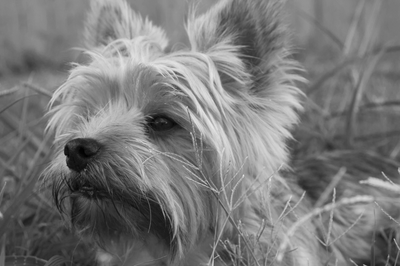

In [10]:
# Display red color channel.
Image.fromarray(np.uint8(dog_array[:, :, 0]))

In [11]:
dog_array

array([[[133,  84,  54],
        [132,  85,  55],
        [132,  85,  57],
        ..., 
        [123,  73,  50],
        [124,  74,  50],
        [124,  74,  49]],

       [[133,  83,  55],
        [132,  84,  54],
        [132,  85,  55],
        ..., 
        [123,  73,  50],
        [123,  73,  48],
        [124,  73,  48]],

       [[132,  82,  56],
        [133,  84,  55],
        [133,  84,  56],
        ..., 
        [123,  71,  47],
        [123,  71,  47],
        [124,  72,  48]],

       ..., 
       [[103, 136,   1],
        [102, 133,   1],
        [105, 139,   3],
        ..., 
        [ 58,  74,  46],
        [ 66,  86,  51],
        [ 70,  88,  53]],

       [[104, 137,   1],
        [102, 133,   0],
        [106, 141,   4],
        ..., 
        [ 50,  56,  39],
        [ 57,  69,  43],
        [ 62,  76,  46]],

       [[105, 137,   1],
        [101, 133,   1],
        [106, 140,   3],
        ..., 
        [ 45,  46,  33],
        [ 46,  51,  36],
        [ 50,  58,

For instance, the red color channel above shows more red in the dog's fur than in the grass.

You can manipulate the color channels to change the image (Photoshop is just a fancy matrix editor):

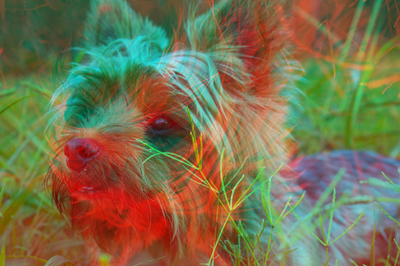

In [63]:
# Flip the red channel upside-down. Running this a second time flips it back.
dog_array[:, :, 0] = np.flipud(dog_array[:, :, 0])
Image.fromarray(np.uint8(dog_array))